# 23장 AI가 문맥을 파악하는 원리

## <목차>

- **23-1. 단어 간 유사성 측정하기**  
- **23-2. 단어들 사이의 관계 파악하기**  
- **23-3. 단어 사이의 관계 수정하기**  
- **23-4. AI가 문맥을 파악하는 법**  
- **23-5. 질문(쿼리), 단서(키), 답변(밸류)**  
- **23-6. 트랜스포머를 위한 어텐션 만들기**  



## 23-1 단어 간 유사성 측정하기

단어간의 유사성 측정이라는 것인데<br />
사과를 한입 베어 먹었다.<br />
친구가 어제 일에 대해서 사과했다.<br />
라고 했을 때 두개의 사과는 다른 의미이다. 이때 이 사과가 어덯게 유사성이 있는지 확인 할 수 있어야 하는데 문맥을 보고 유사성을 분석하게 된다.<br />
먼저 유사성을 알기 위해서는 문자들이 숫자로 바뀌는 임베딩과정을 거쳐야 한다.<br />
다음 가중치를 주고 문맥을 파악하는 과정을 어텐션이라고 한다.<br />
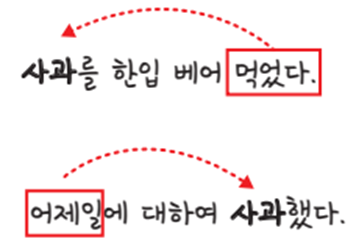<br />
두개의 사과가 다르다는 것은 "먹었다"는 것과 "어제 일"이라는 것 때문에 다르다.<br />
그래서 첫번째는 과일이고 두번째는 행위라는 것을 알 수 있는 것이다.<br />
이러한 결과를 얻어 오기 위해서는 아래와 같이 3가지 과정이 필요하다.<br />
1. 컴퓨터가 알아들을 수 있어야 한다 (임베딩)<br />
2. 단어들 사이의 관계를 파악해야 한다<br />
3. 단어들 사이의 관계가 잘 못되었으면 수정해야 한다.<br />

1. 컴퓨터가 알아들을 수 있어야 한다 (임베딩)<br />
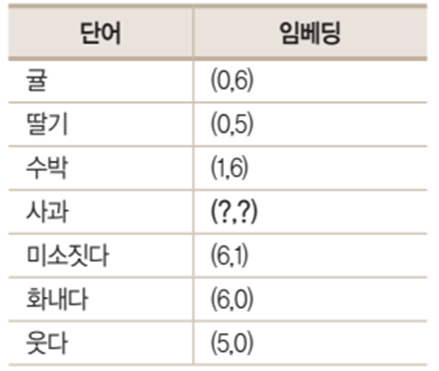<br />
표와 같은 형태의 숫자로 바꿔 주는 작업을 해야 한다. 이렇게 숫자로 바귈 때 비슷한 것 끼리는 숫자도 인접한 숫자를 가지게 된다.<br />
2. 단어들 사이의 관계를 파악해야 한다<br />
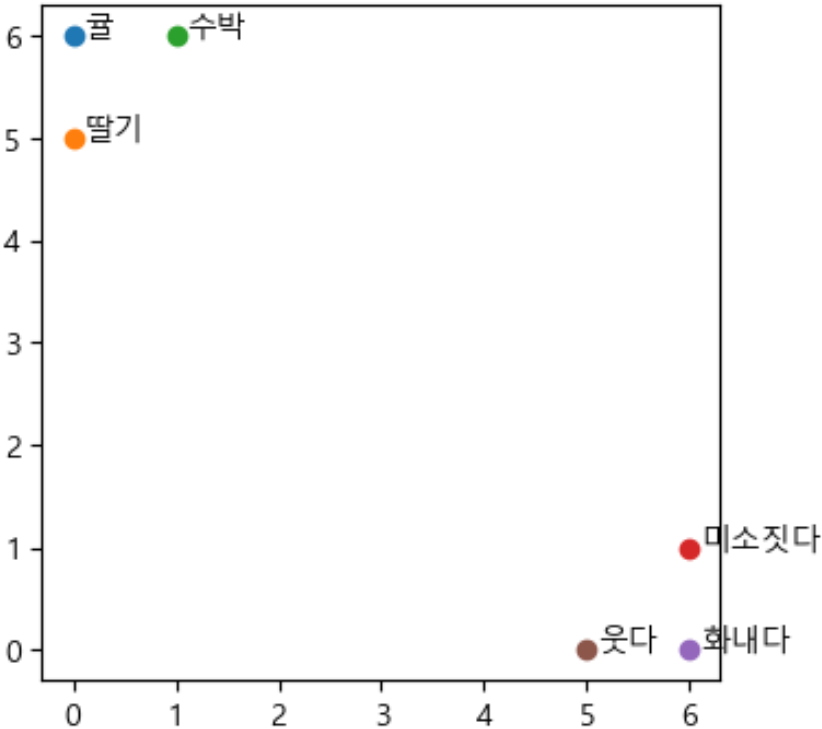<br /> 위 그림과 같이 유사한 것끼리 군집한다<br />
사과가 "먹었다"에 의한 것인지 "어제 일"에 의한 것인지를 파악해서 어느 위치에 갈것인지를 정하게 된다.<br />
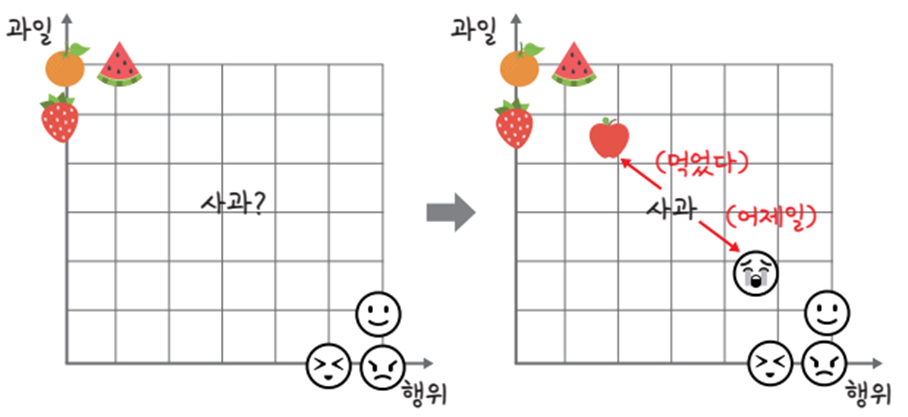<br /> 유사성에 따라 계속 학습을하면서 어디에 있어야 하는지를 파악하게 된다.<br />
이것을 내적을 구한라고 한다.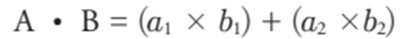<br />
귤과 딸기의 내적값을 보면 (0 * 0) + (6 * 5) = 30<br />
귤과 웃다의 내적값을 보면 (0 * 5) + (6 * 0) = 0 <br />
이 되므로 서로 다르다라는 것으로 판단하게 된다.<br />
내적값을 사용하면 코사인 유사도를 알 수 있는데 유사인 유사도가 따라 유사도를 알 수 있다.<br />
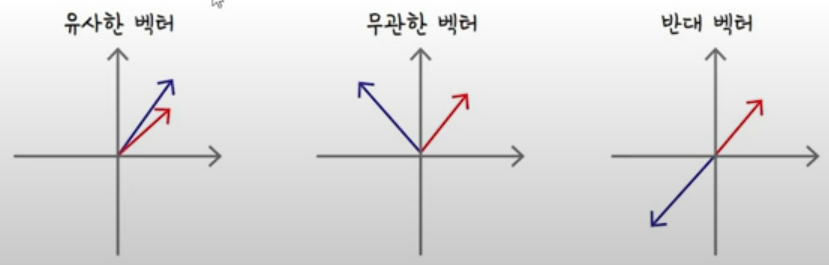<br />

4. 단어들 사이의 관계가 잘 못되었으면 수정해야 한다.<br />
내적을 구한 값에 가중치를 주어서 어디에 해당하는지를 학습하게 된다.

**컴퓨터가 알아 들을 수 있도록 수치 형태로 변환하기**

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 단어와 임베딩 벡터 정의
word_embeddings = {
    '귤': np.array([0, 6]),
    '딸기': np.array([0, 5]),
    '수박': np.array([1, 6]),
    '미소짓다': np.array([6, 1]),
    '화내다': np.array([6, 0]),
    '웃다': np.array([5, 0])
}

#출력해 보기
for word, vec in word_embeddings.items():
    print(f"'{word}'의 임베딩 벡터: {vec}")

'귤'의 임베딩 벡터: [0 6]
'딸기'의 임베딩 벡터: [0 5]
'수박'의 임베딩 벡터: [1 6]
'미소짓다'의 임베딩 벡터: [6 1]
'화내다'의 임베딩 벡터: [6 0]
'웃다'의 임베딩 벡터: [5 0]


**단어를 시각화 하기**

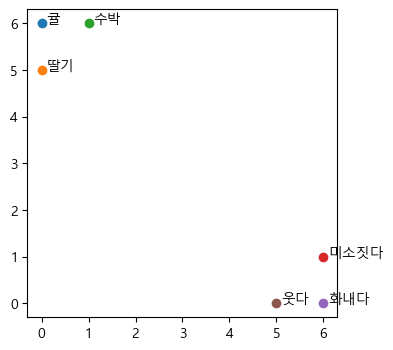

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 단어와 임베딩 벡터 정의
word_embeddings = {
    '귤': np.array([0, 6]),
    '딸기': np.array([0, 5]),
    '수박': np.array([1, 6]),
    '미소짓다': np.array([6, 1]),
    '화내다': np.array([6, 0]),
    '웃다': np.array([5, 0])
}

# 단어 임베딩을 시각화해 봅니다.
plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0] + 0.1, vec[1], word)
plt.show()


<주의> 위 그림속 한글이 깨지면, 맨 하단의 [참고] 부분을 참고해 먼저 폰트를 설치하세요.

## 23-2 단어들 사이의 관계 파악하기

**내적 계산하기**

In [36]:
def dot_product(vec1, vec2):
    return np.dot(vec1, vec2) # np.dot() : **두 배열(벡터 또는 행렬) 간의 곱셈(내적)**

# 예제 단어들 사이의 내적 계산
print("귤 • 딸기:", dot_product(word_embeddings['귤'], word_embeddings['딸기']))
print("귤 • 웃다:", dot_product(word_embeddings['귤'], word_embeddings['웃다']))



귤 • 딸기: 30
귤 • 웃다: 0


**코사인 유사도 계산하기**

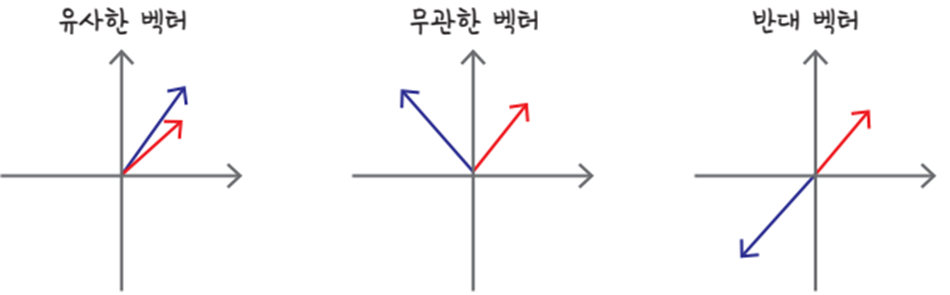<br />
‘귤’과 ‘딸기’의 내적 값이 크다는 것은 두 단어의 관계가 가깝다는 뜻이고, 내적 값이 0인 ‘귤’과 ‘웃다’는 두 단어가 전혀 유사하지 않다는 것을 의미<br />
내적의 값이 너무 클 경우, 이를 비교하기 어려움<br />
이를 보정하기 위해 벡터의 길이로 나누는 스케일된 내적(scaled dot product) 방법이나 각도를 이용하는 코사인 유사도(Cosine similarity) 방법이 있음<br />
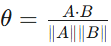 : 코사인 식

In [8]:
#코사인 유사도는 두 벡터의 방향이 얼마나 유사한지를 측정하는 지표이다. 두 벡터 사이의 각도를 코사인 값을 이용해 계산하며, 벡터의 크기(길이)와는 무관하다.
#    1에 가까울수록: 두 벡터의 방향이 매우 유사하다는 의미. 각도가 0도에 가까울수록 코사인 값은 1에 수렴.
#    0에 가까울수록: 두 벡터가 서로 직교(수직)한다는 의미. 각도가 90도일 때 코사인 값은 0.
#    -1에 가까울수록: 두 벡터의 방향이 정반대라는 의미. 각도가 180도일 때 코사인 값은 -1.
def cosine_similarity(v1, v2): # def cosine_similarity(v1, v2): # 코사인 유사도
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)) # v1의 크기, v2의 크기
    # 코사인 값 = 내적 /  (v1의 크기 * v2의 크기)
words = list(word_embeddings.keys())
embedding_vectors = np.array(list(word_embeddings.values()))

# 코사인 유사성 계산
similarities = []
for v1 in embedding_vectors:
    row = []
    for v2 in embedding_vectors:
        row.append(cosine_similarity(v1, v2)) # cosine_similarity(v1, v2)는 1.00, 1.00, 0.99, 0.16,... 등의 유사도가 계산된다. 
    similarities.append(row)

# 결과 출력
for i in range(len(words)):
    for j in range(len(words)):
        print(f"{words[i]} • {words[j]} 유사성: {similarities[i][j]:.2f}")


귤 • 귤 유사성: 1.00
귤 • 딸기 유사성: 1.00
귤 • 수박 유사성: 0.99
귤 • 미소짓다 유사성: 0.16
귤 • 화내다 유사성: 0.00
귤 • 웃다 유사성: 0.00
딸기 • 귤 유사성: 1.00
딸기 • 딸기 유사성: 1.00
딸기 • 수박 유사성: 0.99
딸기 • 미소짓다 유사성: 0.16
딸기 • 화내다 유사성: 0.00
딸기 • 웃다 유사성: 0.00
수박 • 귤 유사성: 0.99
수박 • 딸기 유사성: 0.99
수박 • 수박 유사성: 1.00
수박 • 미소짓다 유사성: 0.32
수박 • 화내다 유사성: 0.16
수박 • 웃다 유사성: 0.16
미소짓다 • 귤 유사성: 0.16
미소짓다 • 딸기 유사성: 0.16
미소짓다 • 수박 유사성: 0.32
미소짓다 • 미소짓다 유사성: 1.00
미소짓다 • 화내다 유사성: 0.99
미소짓다 • 웃다 유사성: 0.99
화내다 • 귤 유사성: 0.00
화내다 • 딸기 유사성: 0.00
화내다 • 수박 유사성: 0.16
화내다 • 미소짓다 유사성: 0.99
화내다 • 화내다 유사성: 1.00
화내다 • 웃다 유사성: 1.00
웃다 • 귤 유사성: 0.00
웃다 • 딸기 유사성: 0.00
웃다 • 수박 유사성: 0.16
웃다 • 미소짓다 유사성: 0.99
웃다 • 화내다 유사성: 1.00
웃다 • 웃다 유사성: 1.00


## 23-3 단어 사이의 관계 수정하기

아직 정해지지 않은 ‘사과’의 임베딩을 과일 그룹, 또는 행위 그룹 쪽으로 이동시킬 차례<br />
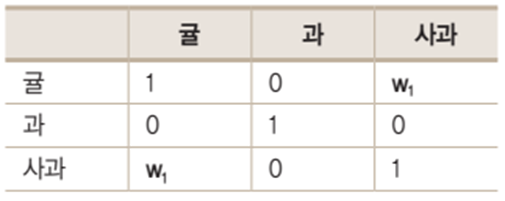<br />
행위와 관련된 ‘사과’가 들어간 ‘어제일을 사과’라는 구문도 마찬가지임<br />
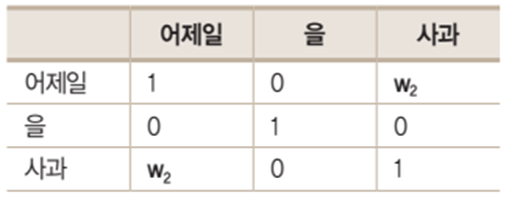<br />
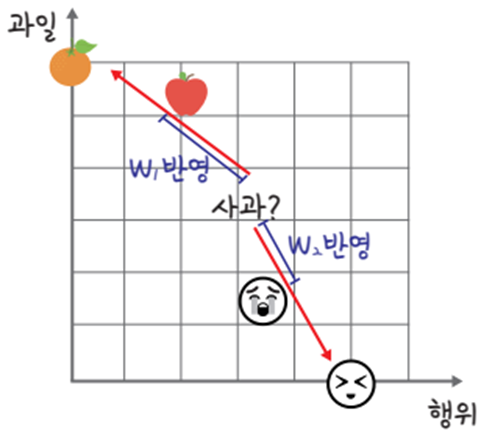

**관계 업데이트**

In [38]:
              #   현재값      목표 값        유사도             학습률
def update_vector(vector, target_vector, similarity_value, learning_rate):
    new_vector = vector + learning_rate * (target_vector - vector) * similarity_value
                                          # 목표값에 현재값을 뺀 것을 곱해야 함,
                                          # similarity_value에 따라 적절히 조절함. 
    return new_vector

# 기존 딕셔너리에 추가
word_embeddings['사과'] = np.array([3, 3])  # '사과' 초기 값 추가
word_embeddings['과'] = np.array([0, 0])    # '과' 벡터 추가

# 벡터 값 가져오기
귤 = word_embeddings['귤']
사과 = word_embeddings['사과']
과 = word_embeddings['과']

# '귤과 사과' 문장의 각 단어별 코사인 유사도
cosine_귤_사과 = cosine_similarity(귤, 사과) # cosine_similarity를 이용해서 유사도를 구한다.
cosine_과_사과 = cosine_similarity(과, 사과)

# 학습률1의 예
learning_rate1 = 0.47 # 학습률을 임의로 정했다.

# '사과' 벡터를 '귤' 쪽으로 업데이트
print(f"업데이트 이전의 사과 벡터 (사과_?): {사과}") # 현재는 어디에 속하는지 모르기 때문에 [3 3]
                        # 사과가 귤 쪽에 가까와야 한다면 큘을 목표값으로주고 코사인 유사도도 귤_사과에 해당되는 값으로 줘야 한다.
사과_과일 =  update_vector(사과, 귤, cosine_귤_사과, learning_rate1) # 사과를 어제일로 바꾸고 싶다면 target_vector(목표값), similarity_value(유사도)를 바꿔주면 된다.
print(f"업데이트된 사과 벡터 (사과_과일): {사과_과일}")  
# update_vector를 지나면서 사과가 [3 3]에서 [2.003 3.997]로 수정된 것을 확인 할 수 있다.

업데이트 이전의 사과 벡터 (사과_?): [3 3]
업데이트된 사과 벡터 (사과_과일): [2.003 3.997]


C:\Users\taehj\AppData\Local\Temp\ipykernel_5804\4162871368.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


**모두 실행**

업데이트 이전의 사과 벡터 (사과_?): [3 3]
업데이트된 사과 벡터 (사과_과일): [2.003 3.997]
업데이트된 사과 벡터 (사과_행위): [3.9907 2.0093]


C:\Users\taehj\AppData\Local\Temp\ipykernel_5804\233880076.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return dot_product / (norm_v1 * norm_v2)


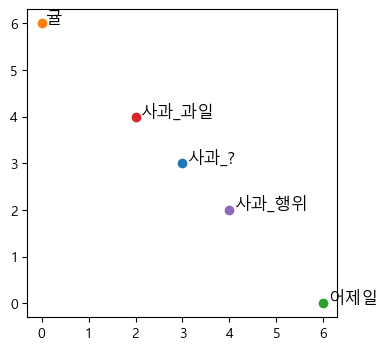

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 벡터값 설정
사과 = np.array([3, 3])
귤 = np.array([0, 6])
과 = np.array([0, 0])
을 = np.array([0, 0])
어제일 = np.array([6, 0])

def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

def update_vector(vector, target_vector, similarity_value, learning_rate):
    new_vector = vector + learning_rate * (target_vector - vector) * similarity_value
    return new_vector

# '귤과 사과' 문장의 각 단어별 코사인 유사도
cosine_귤_사과 = cosine_similarity(귤, 사과)
cosine_과_사과 = cosine_similarity(과, 사과)

# 학습률1을 설정하겠습니다.
learning_rate1 = 0.47

# '사과' 벡터를 '귤' 쪽으로 업데이트
print(f"업데이트 이전의 사과 벡터 (사과_?): {사과}")
사과_과일 = update_vector(사과, 귤, cosine_귤_사과, learning_rate1)
print(f"업데이트된 사과 벡터 (사과_과일): {사과_과일}")

# '어제일을 사과' 문장의 각 단어별 코사인 유사도
cosine_어제일_사과 = cosine_similarity(어제일, 사과_과일)
cosine_을_사과 = cosine_similarity(을, 사과_과일)

# 학습률2를 설정하겠습니다.
learning_rate2 = 1.11

# '사과' 벡터를 '어제일' 쪽으로 업데이트
사과_행위 = update_vector(사과_과일, 어제일, cosine_어제일_사과, learning_rate2)
print(f"업데이트된 사과 벡터 (사과_행위): {사과_행위}")

# 단어 임베딩 시각화
word_embeddings = {
    "사과_?": 사과,
    "귤": 귤,
    "어제일": 어제일,
    "사과_과일": 사과_과일,
    "사과_행위": 사과_행위
}

plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0] + 0.1, vec[1], word, fontsize=12)

plt.show()


## 23-4 AI가 문맥을 파악하는 법

어텐션의 토큰당 벡터의 크기를 일반적으로 512벡터 크기 만큼을 사용한다,<br />
커피 한잔 어때? 라는 문장이 있을 때 각각의 단어를 나타내는 값으로 채워져 있는 512개의 벡터로 만들어서 사용한다.<br />
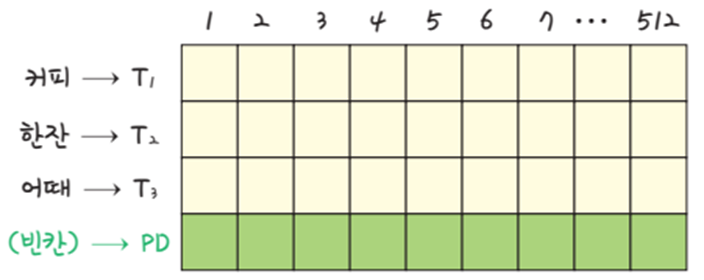

관계를 알기 위해서는 내적을 구해야 하는데 내적 값을 구하기 위해서는 행과 열이 맞아야 한다.<br />
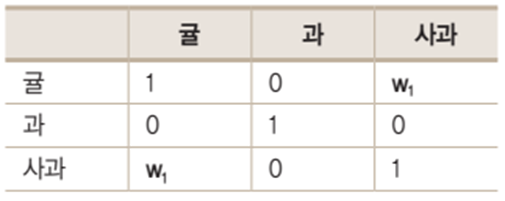<br />
위에서 내적값을 구한 것 처럼 행이 3개이면 열도 3개여야 한다. <br />
내적을 구하기 위해서는 행과 열의 길이가 같아야 한다

그러므로 512개의 열이 4 * 4가 되도록 해야한다.<br />
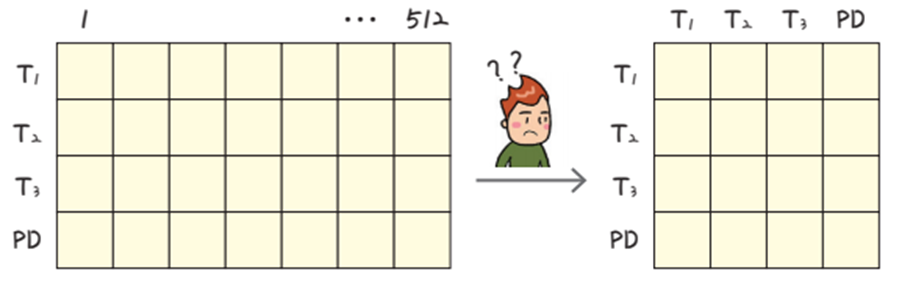<br />

그래서 어텐션 알고리즘은 512개로 되어 있는 열을 64개의 열로 되어 있는 8개의 해드로 만들어준다.<br />
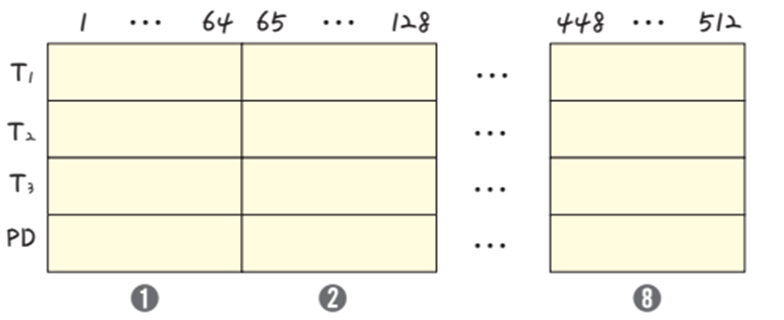<br />

분리된 해드를 전치행렬로 변경된 행렬과 곱하면 4 * 4인 내적 테이블이 된다.<BR />
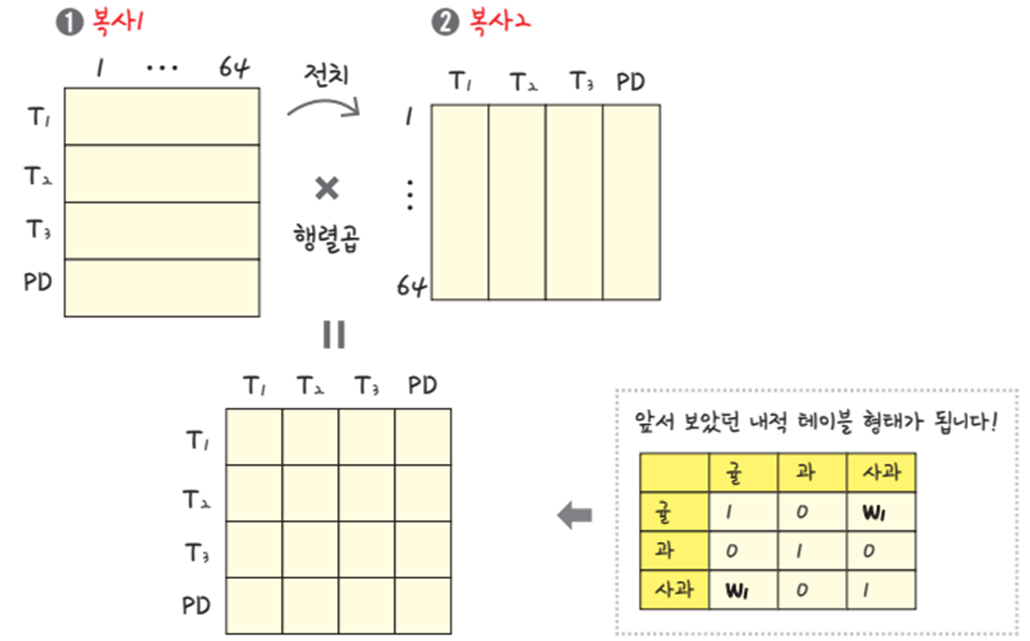

이제 다시 원래 행렬로 돌아가야 한다. 4 * 512행렬<BR />
내적 테이블에 원래 있던 4 * 64 행렬을 곱하여 내용이 달라진 4 * 64 행열로 만들어준다. <BR />
이것을 8번을 해서 4* 512 를 만들어 준다.<br />
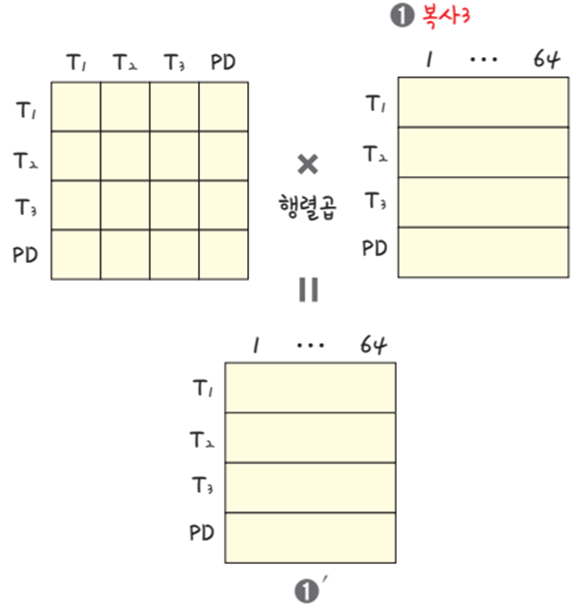

8개의 행렬을 합쳐서 512행렬을 만들어주면 된다.
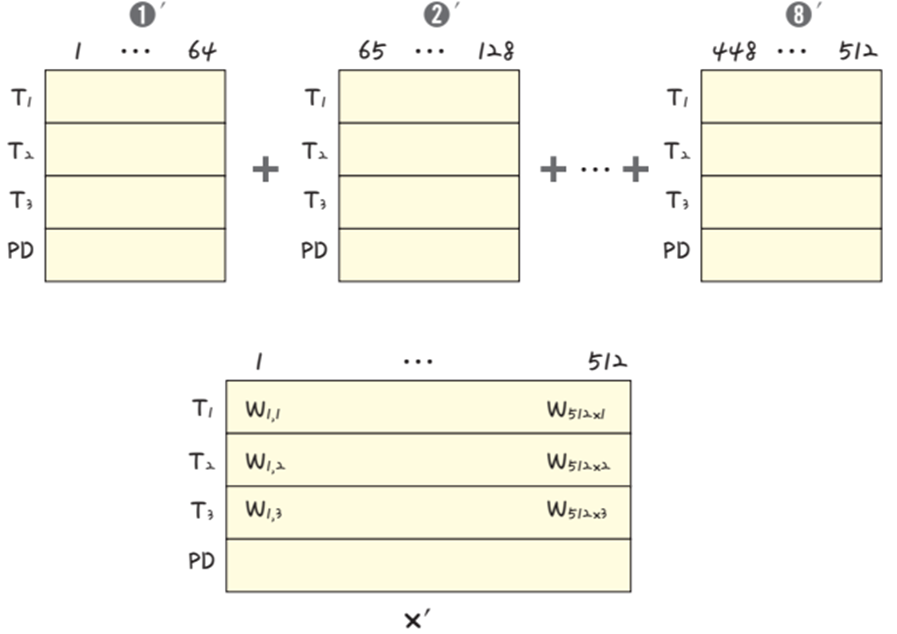

**임베딩 행렬의 형태**

In [40]:
# import numpy as np

# 단어와 해당 임베딩 벡터를 딕셔너리로 정의합니다.
# 실제로는 사전 훈련된 임베딩 벡터를 사용하는 것이 일반적입니다.
embedding_dict = {
    '커피': np.random.rand(512),
    '한잔': np.random.rand(512),
    '어때': np.random.rand(512),
    'PAD': np.zeros(512)  # 패딩 벡터는 0으로 채웁니다.
}

# 입력 문장
sentence = ['커피', '한잔', '어때']
max_len = 4  # 최대 문장 길이
tokens = sentence + ['PAD'] * (max_len - len(sentence))  # ['PAD']를 패딩 적용
'''
len(sentence)는 3 (['커피','한잔','어때']).
max_len - len(sentence)는 4 - 3 = 1.
['PAD'] * 1 ⇒ ['PAD'] (문자열 ‘PAD’를 1번 반복한 리스트).
sentence + ['PAD'] ⇒ ['커피','한잔','어때','PAD'].
즉, 부족한 길이만큼 ‘PAD’를 뒤에 붙여 max_len 길이를 맞춥니다.
'''

# 토큰을 임베딩 벡터로 변환
embeddings = np.array([embedding_dict[token] for token in tokens])
'''
'커피' → (512,) 벡터
'한잔' → (512,) 벡터
'어때' → (512,) 벡터
'PAD' → (512,) 0벡터
'''
print("임베딩 행렬의 형태:", embeddings.shape)  # (4, 512)


임베딩 행렬의 형태: (4, 512)


위 코드가 실행된 결과<br />
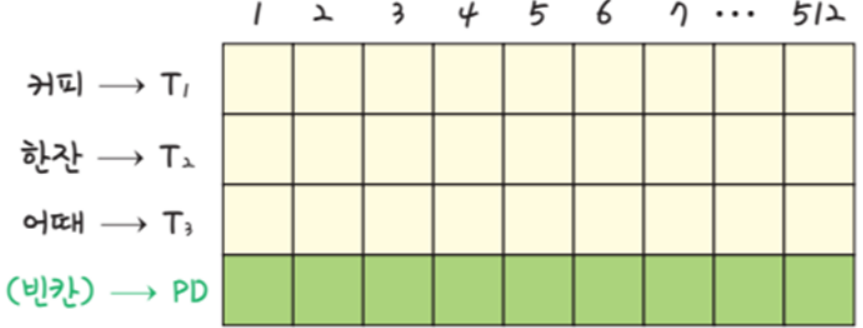

**각 헤드의 형태**

In [41]:
num_heads = 8
head_dim = 512 // num_heads  # 각 헤드의 차원 : 512를 8로 나눈 값이므로 head_dim = 64가 된다.

# 임베딩을 8개의 헤드로 분할
heads = np.split(embeddings, num_heads, axis=1)  # heads는 4행 64열짜리 8개를 저장하고 있자.
print("각 헤드의 형태:", heads[0].shape)  # (4, 64)


각 헤드의 형태: (4, 64)


**내적 결과 행렬의 형태**

In [42]:
# 첫 번째 헤드 선택
head_1 = heads[0]

# 복사1과 복사2 생성
copy1 = head_1
copy2 = head_1.T   # 전치 행렬만들기

# 내적 계산
attention_scores = np.dot(copy1, copy2) # 첫번째 해드와 전치행렬을 곱해서 4 * 4 행렬을 만든다.
print("내적 결과 행렬의 형태:", attention_scores.shape)  # (4, 4)


내적 결과 행렬의 형태: (4, 4)


**복원된 헤드의 형태**

In [43]:
# 복사3 생성
copy3 = embeddings[:, :head_dim]

# 다시 4x64 형태로 변환
restored_head = np.dot(attention_scores, copy3) # 내적 행렬과 해더를 곱해 4 * 64 행렬로 다시 바꾼다.
print("복원된 헤드의 형태:", restored_head.shape)  # (4, 64)


복원된 헤드의 형태: (4, 64)


**최종 출력 행렬의 형태**

In [44]:
restored_heads = []
              # num_heads는 8이므로 8번 반복
for i in range(num_heads):   # 위 작업을 8번을 해야 하므로 반복문을 사용하여 4 * 512 인 행렬로 다시 만든다.
    head = heads[i] 
    copy1 = head
    copy2 = head.T
    attention_scores = np.dot(copy1, copy2)
    copy3 = embeddings[:, i*head_dim:(i+1)*head_dim]
    '''
        i*head_dim : (i+1)*head_dim
        → 열(차원)을 잘라내는 범위.
            i=0 → 0:64 (첫 64차원)
            i=1 → 64:128 (다음 64차원)
            …
            i=7 → 448:512 (마지막 64차원)
    '''
    restored_head = np.dot(attention_scores, copy3)
    restored_heads.append(restored_head)

# 모든 헤드를 결합하여 원래 차원으로 복원
final_output = np.concatenate(restored_heads, axis=1)
print("최종 출력 행렬의 형태:", final_output.shape)  # (4, 512)


최종 출력 행렬의 형태: (4, 512)


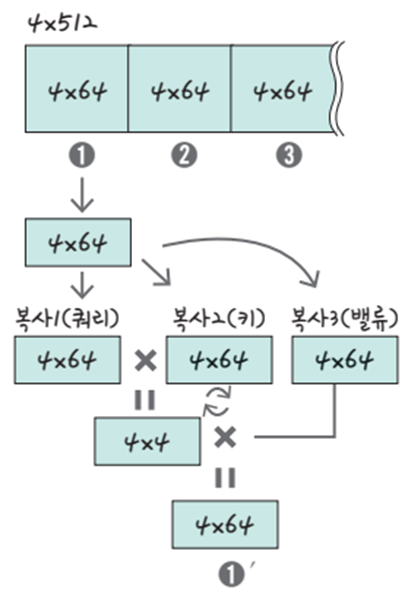

**전체 실행**

In [45]:
import numpy as np

# 단어와 해당 임베딩 벡터를 딕셔너리로 정의합니다.
embedding_dict = {
    '커피': np.random.rand(512),
    '한잔': np.random.rand(512),
    '어때': np.random.rand(512),
    'PAD': np.zeros(512)  # 패딩 벡터는 0으로 채웁니다.
}

# 입력 문장
sentence = ['커피', '한잔', '어때']
max_len = 4  # 최대 문장 길이
tokens = sentence + ['PAD'] * (max_len - len(sentence))  # 패딩 적용

# 토큰을 임베딩 벡터로 변환
embeddings = np.array([embedding_dict[token] for token in tokens]) # 4 * 512 행렬 만들기
print("임베딩 행렬의 형태:", embeddings.shape)  # (4, 512)

# 임베딩을 8개의 헤드로 분할
num_heads = 8
head_dim = 512 // num_heads  # 각 헤드의 차원  

# 임베딩을 8개의 헤드로 분할
heads = np.split(embeddings, num_heads, axis=1) # 4 * 64 행렬로 나눈다.
print("각 헤드의 형태:", heads[0].shape)  # (4, 64)

# 각 헤드간의 내적 계산 및 복원
restored_heads = []


for i in range(num_heads):  
    head = heads[i] # i번째 헤드 선택
    copy1 = head # 첫 번째 복사본
    copy2 = head.T # 두 번째 복사본 (전치)
    attention_scores = np.dot(copy1, copy2) # 내적 계산 (4x4 행렬)
    copy3 = embeddings[:, i*head_dim:(i+1)*head_dim] # 복사3 생성 (4x64)
    restored_head = np.dot(attention_scores, copy3) #내적 결과와 복사3을 곱하여 복원 (4x64)
    restored_heads.append(restored_head) # 복원된 헤드를 리스트에 추가

# 모든 헤드를 결합하여 원래 차원으로 복원
final_output = np.concatenate(restored_heads, axis=1)
print("최종 출력 행렬의 형태:", final_output.shape)  # (4, 512)


임베딩 행렬의 형태: (4, 512)
각 헤드의 형태: (4, 64)
최종 출력 행렬의 형태: (4, 512)


## 23-5 질문(쿼리), 단서(키), 답변(밸류)

**쿼리, 키, 밸류**

In [46]:
# 쿼리, 키, 밸류 행렬 초기화
num_heads = 8
head_dim = 512 // num_heads  # 각 헤드의 차원
heads = np.split(embeddings, num_heads, axis=1)
queries = heads.copy() # 해드들을 키로 만들다.
keys = [head.T for head in heads] # 해드들의 전치행렬을 만들다/
values = heads.copy() # 해드로 밸류를 만든다.

print("쿼리 행렬의 형태:", queries[0].shape)  # (4, 64) 쿼리
print("키 행렬의 형태:", keys[0].shape)  # (64, 4) 키 
print("밸류 행렬의 형태:", values[0].shape)  # (4, 64) 밸류


쿼리 행렬의 형태: (4, 64)
키 행렬의 형태: (64, 4)
밸류 행렬의 형태: (4, 64)


**스케일링 전 어텐션 스코어**

In [47]:
# 스케일링은 값이 크지 않게 만들어주는 것이다.
# 스케일링 전 
attention_scores = np.dot(queries[0], keys[0])
print("스케일링 전 어텐션 스코어:")
print(attention_scores)

# 스케일링을 위한 헤드 차원의 제곱근 계산 : 제곱근 한 값을 구한다. 9의 재곱근은 3이다.
scaling_factor = np.sqrt(head_dim)   # scaling_factor = np.sqrt(64) = 8

# 스케일링 후 : 큰 값을 줄이기 위한 방법
scaled_attention_scores = attention_scores / scaling_factor # 제곱근 값으로 나눈다.
print("스케일링 후 어텐션 스코어:")
print(scaled_attention_scores)


스케일링 전 어텐션 스코어:
[[21.6197 14.3423 15.3228  0.    ]
 [14.3423 17.7212 13.6876  0.    ]
 [15.3228 13.6876 20.6425  0.    ]
 [ 0.      0.      0.      0.    ]]
스케일링 후 어텐션 스코어:
[[2.7025 1.7928 1.9153 0.    ]
 [1.7928 2.2152 1.711  0.    ]
 [1.9153 1.711  2.5803 0.    ]
 [0.     0.     0.     0.    ]]


스케일링을 하는 이유는 어텐션 스코어가 무한히 큰값 일 때 값을 줄여주기 위해서 하는 작업이다.

- 소프트맥스와 패딩 적용하기<br />
스케일링한 값에 소프트맥스를 적용시키면 내적을 구하기 위한 행렬에서 pd를 제외한 나머지값을 더한 값이 1이되게 만들기 위한 것이다.<br />
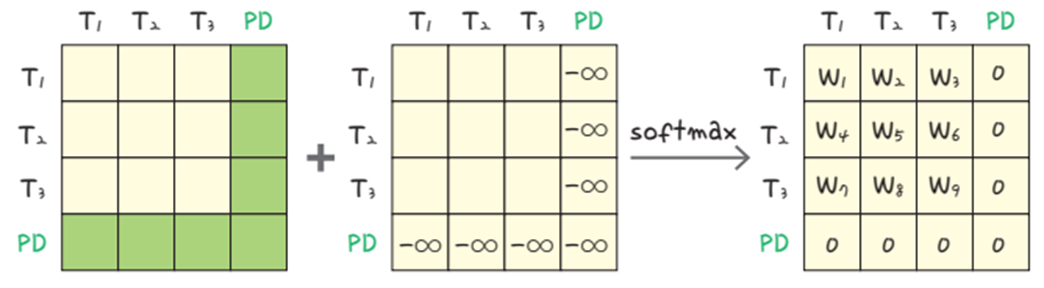 <br />
패드 부분이 0일 때 소프맥스과정을 거쳐도 패드부분이 0이되어야 한다. 그러기 위해서는 패드부분을 마이너스 무한대로 놓으면 소프트맥스과정을 거쳤을 때 0이된다.

소프트맥스 적용 후 어텐션 스코어이다 <br />
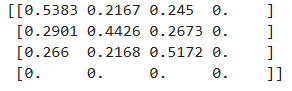

**소프트맥스 적용 후 어텐션 스코어**

In [48]:
# 패딩 부분을 -∞로 채운 마스크 행렬 준비
mask = np.zeros_like(scaled_attention_scores)
mask[:, -1] = -np.inf  # 마지막 열을 패딩 처리, -∞로 채운다.
mask[-1, :] = -np.inf  # 마지막 행을 패딩 처리, -∞로 채운다.

# 사용자 소프트맥스 함수
def masked_softmax(x, mask):
    x_exp = np.exp(x - np.max(x, axis=-1, keepdims=True))  # 오버플로 방지
    x_exp = x_exp * (mask != -np.inf)  # 마스크된 부분은 0으로 처리
    x_sum = np.sum(x_exp, axis=-1, keepdims=True) # 지수 값의 합 계산
    x_sum = np.where(x_sum == 0, 1, x_sum)  # 0으로 나누는 것을 방지하기 위해 합이 0인 경우 1로 설정
    return x_exp / x_sum # 소프트맥스 계산

# 소프트맥스 적용
attention_probs = masked_softmax(scaled_attention_scores, mask)
print("소프트맥스 적용 후 어텐션 스코어:")
print(attention_probs)


소프트맥스 적용 후 어텐션 스코어:
[[0.5383 0.2167 0.245  0.    ]
 [0.2901 0.4426 0.2673 0.    ]
 [0.266  0.2168 0.5172 0.    ]
 [0.     0.     0.     0.    ]]


**전체 실행**

In [49]:
import numpy as np

# 전체 출력 형식을 소수점 이하 네 자리로 설정
np.set_printoptions(precision=4, suppress=True)

# 단어와 해당 임베딩 벡터를 딕셔너리로 정의합니다.
embedding_dict = {
    '커피': np.random.rand(512),
    '한잔': np.random.rand(512),
    '어때': np.random.rand(512),
    'PAD': np.zeros(512)  # 패딩 벡터는 0으로 채웁니다.
}

# 입력 문장
sentence = ['커피', '한잔', '어때']
max_len = 4  # 최대 문장 길이
tokens = sentence + ['PAD'] * (max_len - len(sentence))  # 패딩 적용

# 토큰을 임베딩 벡터로 변환
embeddings = np.array([embedding_dict[token] for token in tokens])
print("임베딩 행렬의 형태:", embeddings.shape)  # (4, 512)

# 쿼리, 키, 밸류 행렬 초기화
num_heads = 8
head_dim = 512 // num_heads  # 각 헤드의 차원
heads = np.split(embeddings, num_heads, axis=1)
queries = heads.copy()
keys = [head.T for head in heads]
values = heads.copy()

print("쿼리 행렬의 형태:", queries[0].shape)  # (4, 64)
print("키 행렬의 형태:", keys[0].shape)  # (64, 4)
print("밸류 행렬의 형태:", values[0].shape)  # (4, 64)

# 2. 스케일링 전후의 결과
# 스케일링 전
attention_scores = np.dot(queries[0], keys[0])
print("스케일링 전 어텐션 스코어:")
print(attention_scores)

# 스케일링을 위한 헤드 차원의 제곱근 계산
scaling_factor = np.sqrt(head_dim)

# 스케일링 후
scaled_attention_scores = attention_scores / scaling_factor
print("스케일링 후 어텐션 스코어:")
print(scaled_attention_scores)

# 3. 어텐션 스코어 계산 및 소프트맥스 적용 전후의 결과

# 패딩 부분을 -∞로 채운 마스크 행렬 준비
mask = np.zeros_like(scaled_attention_scores)
mask[:, -1] = -np.inf  # 예시로 마지막 열을 패딩 처리
mask[-1, :] = -np.inf  # 예시로 마지막 행을 패딩 처리

# 소프트맥스 적용 함수
def masked_softmax(x, mask):
    x_exp = np.exp(x - np.max(x, axis=-1, keepdims=True))  # 오버플로 방지
    x_exp = x_exp * (mask != -np.inf)  # 마스크된 부분은 0으로 처리
    x_sum = np.sum(x_exp, axis=-1, keepdims=True)
    x_sum = np.where(x_sum == 0, 1, x_sum)  # 0으로 나누는 것을 방지
    return x_exp / x_sum

# 소프트맥스 적용
attention_probs = masked_softmax(scaled_attention_scores, mask)
print("소프트맥스 적용 후 어텐션 스코어:")
print(attention_probs)

# 복원된 헤드를 저장할 리스트
restored_heads = []

for i in range(num_heads):
    query = queries[i]
    key = keys[i]
    value = values[i]

    # 내적 계산 후 스케일링
    attention_scores = np.dot(query, key) / scaling_factor

    # 패딩 처리
    padding_mask = (np.array(tokens) == 'PAD').astype(float)
    padding_mask = np.tile(padding_mask, (attention_scores.shape[0], 1))
    attention_scores = np.where(padding_mask, -np.inf, attention_scores)

    # 소프트맥스 적용
    attention_weights = masked_softmax(attention_scores, padding_mask)

    # 밸류와의 곱셈
    restored_head = np.dot(attention_weights, value)
    restored_heads.append(restored_head)

# 모든 헤드를 결합하여 원래 차원으로 복원
final_output = np.concatenate(restored_heads, axis=1)
print("최종 출력 행렬의 형태:", final_output.shape)  # (4, 512)


임베딩 행렬의 형태: (4, 512)
쿼리 행렬의 형태: (4, 64)
키 행렬의 형태: (64, 4)
밸류 행렬의 형태: (4, 64)
스케일링 전 어텐션 스코어:
[[21.7638 18.1826 17.9308  0.    ]
 [18.1826 24.5147 19.4734  0.    ]
 [17.9308 19.4734 24.0959  0.    ]
 [ 0.      0.      0.      0.    ]]
스케일링 후 어텐션 스코어:
[[2.7205 2.2728 2.2414 0.    ]
 [2.2728 3.0643 2.4342 0.    ]
 [2.2414 2.4342 3.012  0.    ]
 [0.     0.     0.     0.    ]]
소프트맥스 적용 후 어텐션 스코어:
[[0.4428 0.283  0.2742 0.    ]
 [0.2282 0.5036 0.2682 0.    ]
 [0.2286 0.2773 0.4941 0.    ]
 [0.     0.     0.     0.    ]]
최종 출력 행렬의 형태: (4, 512)


## 23-6 트랜스포머를 위한 어텐션 만들기

**여러 문장의 임베딩**

In [50]:
# 입력 문장
sentences = [
    ['<sos>', '커피', '한잔', '어때', '<eos>'],
    ['<sos>', '오늘', '날씨', '좋네', '<eos>'],
    ['<sos>', '옷이', '어울려요', '<eos>', 'PAD'] # 문장의 길이가 작아서 pad를 포함 시켰다.
]

# 단어와 해당 임베딩 벡터를 딕셔너리로 정의합니다.
embedding_dict = { ## 임베딩 과정을 거친다.
    '<sos>': np.random.rand(512),
    '<eos>': np.random.rand(512),
    '커피': np.random.rand(512),
    '한잔': np.random.rand(512),
    '어때': np.random.rand(512),
    '오늘': np.random.rand(512),
    '날씨': np.random.rand(512),
    '좋네': np.random.rand(512),
    '옷이': np.random.rand(512),
    '어울려요': np.random.rand(512),
    'PAD': np.zeros(512)  # 패딩 벡터는 0으로 채웁니다.
}

max_len = 5  # 최대 문장 길이 # 최대 문장 길이가 5이므로 5로 정했다.

# 토큰을 임베딩 벡터로 변환
embeddings = np.array([[embedding_dict[token] for token in sentence] for sentence in sentences])
print("임베딩 행렬의 형태:", embeddings.shape)  # (3, 5, 512)


임베딩 행렬의 형태: (3, 5, 512)


커피 한잔 어때라는 하나의 문장만으로는 트랜스포머를 만들수 없으므로 여러개의 문장을 사용한다.<br />
각각의 문장은 패드까지 포함하여 5 * 512 인 3개의 행렬이 다음 그림과 같이 만들어 진다.<br />
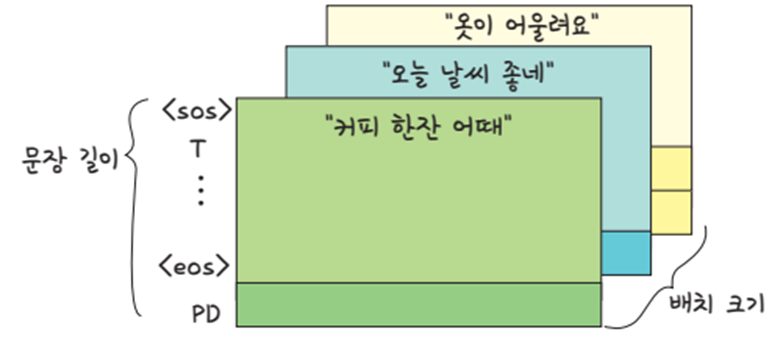<br />
문장의 처음을 아려주기 위한 <sos>와 끝을 알려주는 <eos>를 적어준다. 문장의 길이는 이 두개를 포함해야 한다.

**여러 문장에서의 키, 쿼리, 밸류**

In [51]:
# 쿼리, 키, 밸류 행렬 초기화는 위에서 설명한 것과 같다,
num_heads = 8
head_dim = 512 // num_heads  # 각 헤드의 차원
heads = np.split(embeddings, num_heads, axis=2) # 512차원 임베딩 벡터를 8개의 헤드로 분할하여 heads에 저장
queries = heads.copy()
keys = [head.transpose(0, 2, 1) for head in heads] # 키 행렬을 각 헤드의 전치를 통해 초기화 (첫 번째 축: 배치 크기, 두 번째 축: 문장 길이, 세 번째 축: 헤드 차원)
values = heads.copy()

print("쿼리 행렬의 형태:", queries[0].shape)  # (3, 5, 64)
print("키 행렬의 형태:", keys[0].shape)  # (3, 64, 5)
print("밸류 행렬의 형태:", values[0].shape)  # (3, 5, 64)


쿼리 행렬의 형태: (3, 5, 64)
키 행렬의 형태: (3, 64, 5)
밸류 행렬의 형태: (3, 5, 64)


**전체 코드**

In [52]:
import numpy as np

# 전체 출력 형식을 소수점 이하 네 자리로 설정
np.set_printoptions(precision=4, suppress=True)

# 단어와 해당 임베딩 벡터를 딕셔너리로 정의합니다.
embedding_dict = {
    '<sos>': np.random.rand(512),
    '<eos>': np.random.rand(512),
    '커피': np.random.rand(512),
    '한잔': np.random.rand(512),
    '어때': np.random.rand(512),
    '오늘': np.random.rand(512),
    '날씨': np.random.rand(512),
    '좋네': np.random.rand(512),
    '옷이': np.random.rand(512),
    '어울려요': np.random.rand(512),
    'PAD': np.zeros(512)  # 패딩 벡터는 0으로 채웁니다.
}

# 입력 문장
sentences = [
    ['<sos>', '커피', '한잔', '어때', '<eos>'],
    ['<sos>', '오늘', '날씨', '좋네', '<eos>'],
    ['<sos>', '옷이', '어울려요', '<eos>', 'PAD']
]
max_len = 5  # 최대 문장 길이

# 토큰을 임베딩 벡터로 변환
embeddings = np.array([[embedding_dict[token] for token in sentence] for sentence in sentences])
print("임베딩 행렬의 형태:", embeddings.shape)  # (3, 5, 512)

# 쿼리, 키, 밸류 행렬 초기화
num_heads = 8
head_dim = 512 // num_heads  # 각 헤드의 차원
heads = np.split(embeddings, num_heads, axis=2)  # 512차원 임베딩 벡터를 8개의 헤드로 분할하여 heads에 저장
queries = heads.copy()
keys = [head.transpose(0, 2, 1) for head in heads]  # 키 행렬을 각 헤드의 전치를 통해 초기화 (첫 번째 축: 배치 크기, 두 번째 축: 문장 길이, 세 번째 축: 헤드 차원)
values = heads.copy()

print("쿼리 행렬의 형태:", queries[0].shape)  # (3, 5, 64)
print("키 행렬의 형태:", keys[0].shape)  # (3, 64, 5)
print("밸류 행렬의 형태:", values[0].shape)  # (3, 5, 64)

# 특정 토큰 (커피, 한잔, 어때)의 인덱스
tokens_of_interest = ['커피', '한잔', '어때']
indices_of_interest = [sentences[0].index(token) for token in tokens_of_interest]

# 어텐션 이전의 임베딩 테이블 중 특정 토큰들의 평균 값 계산
print("어텐션 이전의 임베딩 테이블 중 '커피', '한잔', '어때' 토큰의 평균 값:")
initial_avg = np.mean(embeddings[0, indices_of_interest, :], axis=1)
print(initial_avg)

# 스케일링 및 어텐션 스코어 계산
attention_scores = np.matmul(queries[0], keys[0])
scaling_factor = np.sqrt(head_dim)
scaled_attention_scores = attention_scores / scaling_factor

# 패딩 처리
mask = np.array([[token == 'PAD' for token in sentence] for sentence in sentences])
mask = mask[:, np.newaxis, :]  # 차원을 맞추기 위해 확장
scaled_attention_scores = np.where(mask, -np.inf, scaled_attention_scores)

# 소프트맥스 적용 함수
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# 복원된 헤드를 저장할 리스트
restored_heads = []

for i in range(num_heads):
    query = queries[i]
    key = keys[i]
    value = values[i]

    # 내적 계산 후 스케일링
    attention_scores = np.matmul(query, key) / scaling_factor

    # 패딩 처리
    mask = np.array([[token == 'PAD' for token in sentence] for sentence in sentences])
    mask = mask[:, np.newaxis, :]  # 차원을 맞추기 위해 확장
    attention_scores = np.where(mask, -np.inf, attention_scores)

    # 소프트맥스 적용
    attention_weights = softmax(attention_scores)

    # 밸류와의 곱셈
    restored_head = np.matmul(attention_weights, value)
    restored_heads.append(restored_head)

# 모든 헤드를 결합하여 원래 차원으로 복원
final_output = np.concatenate(restored_heads, axis=2)

# 어텐션 이후의 결과 중 특정 토큰들의 평균 값 계산
print("어텐션 이후의 결과 중 '커피', '한잔', '어때' 토큰의 평균 값:")
final_avg = np.mean(final_output[0, indices_of_interest, :], axis=1)
print(final_avg)


임베딩 행렬의 형태: (3, 5, 512)
쿼리 행렬의 형태: (3, 5, 64)
키 행렬의 형태: (3, 64, 5)
밸류 행렬의 형태: (3, 5, 64)
어텐션 이전의 임베딩 테이블 중 '커피', '한잔', '어때' 토큰의 평균 값:
[0.5117 0.4929 0.4983]
어텐션 이후의 결과 중 '커피', '한잔', '어때' 토큰의 평균 값:
[0.5069 0.5026 0.5032]


## [참고] 그림 속 폰트가 깨지면 실행하세요.

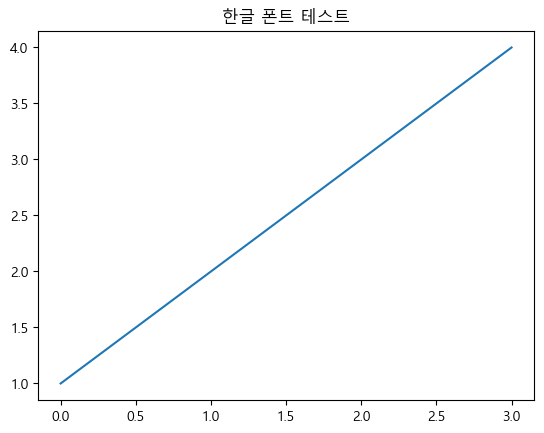

In [53]:
import matplotlib.pyplot as plt

# Matplotlib에서 시스템 기본 폰트인 '맑은 고딕' 사용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# 그래프 그리기
plt.plot([1, 2, 3, 4])
plt.title('한글 폰트 테스트')
plt.show()

In [ ]:
[입력 단어] 
     ↓
  Embedding (E)  ← 학습 가능한 임베딩
     ↓
    LSTM
     ↓
  ┌───────────────┐
  │ Self-Attention│  ← 내적(dot)로 가중치 계산
  └───────────────┘
     ↓
 Concatenate(encoder_outputs + context)
     ↓
TimeDistributed(Dense)
     ↓
   Softmax
     ↓
  손실(loss)
     ↓
  역전파(backprop)
     ↓
  Embedding, LSTM, Attention weight 업데이트


# seq2seq와 어텐션을 이용해서 번역기 만들기

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Attention, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
import pickle

# =========================
# 1. 학습 데이터 준비
# =========================
# 한국어 입력 문장
X_texts = [
    "오늘 날씨 어때",
    "점심 뭐 먹지",
    "지금 몇 시야",
    "기분이 어때",
    "커피 마시고 싶어"
]

# 영어 출력 문장
Y_texts = [
    "How is the weather",
    "What should we eat for lunch",
    "What time is it now",
    "How do you feel",
    "I want to drink coffee"
]

# 디코더 입력에는 <start> 토큰 추가
Y_input = ["<start> " + y for y in Y_texts]
# 디코더 타깃에는 <end> 토큰 추가
Y_target = [y + " <end>" for y in Y_texts]

# =========================
# 2. 토크나이저 정의
# =========================
# 한국어 토크나이저
tokenizer_ko = Tokenizer()
tokenizer_ko.fit_on_texts(X_texts)  # 단어 인덱스 생성

# 영어 토크나이저, 필터링 없음
tokenizer_en = Tokenizer(filters='')
tokenizer_en.fit_on_texts(Y_input + Y_target)  # 디코더 입력/출력 토큰 학습

# 문장을 시퀀스로 변환
X_seq = tokenizer_ko.texts_to_sequences(X_texts)
Y_input_seq = tokenizer_en.texts_to_sequences(Y_input)
Y_target_seq = tokenizer_en.texts_to_sequences(Y_target)

# 시퀀스 최대 길이 계산
max_encoder_len = max(len(s) for s in X_seq)  # 인코더 시퀀스 최대 길이
max_decoder_len = max(len(s) for s in Y_input_seq)  # 디코더 시퀀스 최대 길이

# 시퀀스를 패딩하여 길이 맞춤 (post padding)
X_seq = pad_sequences(X_seq, maxlen=max_encoder_len, padding='post')
Y_input_seq = pad_sequences(Y_input_seq, maxlen=max_decoder_len, padding='post')
Y_target_seq = pad_sequences(Y_target_seq, maxlen=max_decoder_len, padding='post')

# 단어 집합 크기 계산 (+1은 0 패딩 토큰 때문)
X_vocab_size = len(tokenizer_ko.word_index) + 1
Y_vocab_size = len(tokenizer_en.word_index) + 1

# 디코더 타깃을 원-핫 인코딩
Y_target_oh = to_categorical(Y_target_seq, num_classes=Y_vocab_size)

# =========================
# 3. 인코더 정의
# =========================
encoder_inputs = Input(shape=(max_encoder_len,))  # 인코더 입력
enc_emb = Embedding(X_vocab_size, 64)(encoder_inputs)  # 임베딩 (단어 -> 벡터)

# LSTM 인코더, return_sequences=True로 모든 타임스텝 출력 저장
# return_state=True로 마지막 hidden, cell 상태 반환
encoder_lstm = LSTM(128, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# encoder_outputs: 모든 타임스텝의 히든 상태 (어텐션용)
# state_h, state_c: 마지막 상태 (디코더 초기 상태용)

# =========================
# 4. 디코더 정의
# =========================
decoder_inputs = Input(shape=(max_decoder_len,))  # 디코더 입력
dec_emb = Embedding(Y_vocab_size, 64)(decoder_inputs)  # 임베딩

# LSTM 디코더, return_sequences=True로 각 타임스텝 출력 유지
decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])
# 디코더 초기 상태는 인코더 마지막 상태 사용

# =========================
# 5. 어텐션 적용 (Bahdanau Attention)
# =========================
attention = Attention()  # Keras 기본 Attention 레이어
# 디코더 출력과 인코더 출력 비교 후 context vector 생성
context_vector = attention([decoder_outputs, encoder_outputs])
# context_vector: 디코더 각 타임스텝에서 인코더 모든 시퀀스를 참고한 벡터

# 디코더 출력과 context vector 합치기
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, context_vector])

# =========================
# 6. 출력층
# =========================
decoder_dense = Dense(Y_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)
# softmax를 통해 각 단어의 확률 계산

# =========================
# 7. 모델 생성
# =========================
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# =========================
# 8. 학습
# =========================
model.fit([X_seq, Y_input_seq], Y_target_oh, batch_size=2, epochs=200)

# =========================
# 9. 모델/토크나이저 저장
# =========================
model.save("translation_model_attention.h5")  # 모델 저장
with open("tokenizer_ko.pkl", "wb") as f:
    pickle.dump(tokenizer_ko, f)  # 한국어 토크나이저 저장
with open("tokenizer_en.pkl", "wb") as f:
    pickle.dump(tokenizer_en, f)  # 영어 토크나이저 저장
with open("params.pkl", "wb") as f:
    pickle.dump((max_encoder_len, max_decoder_len, Y_vocab_size), f)  # 파라미터 저장

print("✅ Attention 모델과 토크나이저 저장 완료")


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

# =========================
# 1. 모델 및 토크나이저 불러오기
# =========================
model = load_model("translation_model_attention.h5", compile=False)
with open("tokenizer_ko.pkl", "rb") as f:
    tokenizer_ko = pickle.load(f)
with open("tokenizer_en.pkl", "rb") as f:
    tokenizer_en = pickle.load(f)
with open("params.pkl", "rb") as f:
    max_encoder_len, max_decoder_len, Y_vocab_size = pickle.load(f)

# 단어 -> 인덱스, 인덱스 -> 단어 사전
index_to_word_en = {v: k for k, v in tokenizer_en.word_index.items()}

# =========================
# 2. 번역 함수 정의
# =========================
def translate(input_text):
    seq = tokenizer_ko.texts_to_sequences([input_text])
    seq = pad_sequences(seq, maxlen=max_encoder_len, padding='post')

    target_seq = tokenizer_en.texts_to_sequences(["<start>"])
    target_seq = pad_sequences(target_seq, maxlen=max_decoder_len, padding='post')

    output_sentence = []

    for i in range(max_decoder_len):
        preds = model.predict([seq, target_seq], verbose=0)
        sampled_index = np.argmax(preds[0, i, :])
        sampled_word = index_to_word_en.get(sampled_index, '')

        if sampled_word == '<end>':
            break

        output_sentence.append(sampled_word)
        target_seq[0, i+1] = sampled_index

    return ' '.join(output_sentence)

# =========================
# 3. 사용자 입력 반복
# =========================
print("한국어 문장을 입력하면 영어로 번역합니다. 종료하려면 'exit' 입력.")
while True:
    user_input = input("입력: ")
    if user_input.lower() == "exit":
        print("번역 프로그램 종료")
        break
    translation = translate(user_input)
    print(f"번역: {translation}\n")


# self-attention 적용

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Layer
import numpy as np
import pickle

# =========================
# 1. 학습 데이터 준비
# =========================
X_texts = [
    "오늘 날씨 어때",
    "점심 뭐 먹지",
    "지금 몇 시야",
    "기분이 어때",
    "커피 마시고 싶어"
]

Y_texts = [
    "How is the weather",
    "What should we eat for lunch",
    "What time is it now",
    "How do you feel",
    "I want to drink coffee"
]

# 디코더 입력/출력 토큰 추가
Y_input = ["<start> " + y for y in Y_texts]
Y_target = [y + " <end>" for y in Y_texts]

# =========================
# 2. 토크나이저 정의
# =========================
tokenizer_ko = Tokenizer()
tokenizer_ko.fit_on_texts(X_texts)

tokenizer_en = Tokenizer(filters='')
tokenizer_en.fit_on_texts(Y_input + Y_target)

# 시퀀스로 변환
X_seq = tokenizer_ko.texts_to_sequences(X_texts)
Y_input_seq = tokenizer_en.texts_to_sequences(Y_input)
Y_target_seq = tokenizer_en.texts_to_sequences(Y_target)

# 최대 시퀀스 길이
max_encoder_len = max(len(s) for s in X_seq)
max_decoder_len = max(len(s) for s in Y_input_seq)

# 패딩
X_seq = pad_sequences(X_seq, maxlen=max_encoder_len, padding='post')
Y_input_seq = pad_sequences(Y_input_seq, maxlen=max_decoder_len, padding='post')
Y_target_seq = pad_sequences(Y_target_seq, maxlen=max_decoder_len, padding='post')

# 단어 집합 크기
X_vocab_size = len(tokenizer_ko.word_index) + 1
Y_vocab_size = len(tokenizer_en.word_index) + 1

# 디코더 타깃 원-핫 인코딩
Y_target_oh = to_categorical(Y_target_seq, num_classes=Y_vocab_size)

# =========================
# 3. MyAttention 레이어 정의
# =========================
class MyAttention(Layer):
    def __init__(self, **kwargs):
        super(MyAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        decoder_dim = input_shape[0][-1]  # 디코더 출력 차원
        encoder_dim = input_shape[1][-1]  # 인코더 출력 차원

        # Query, Key, Value 가중치
        self.W_q = self.add_weight(shape=(decoder_dim, decoder_dim),
                                   initializer='glorot_uniform',
                                   trainable=True)
        self.W_k = self.add_weight(shape=(encoder_dim, decoder_dim),
                                   initializer='glorot_uniform',
                                   trainable=True)
        self.W_v = self.add_weight(shape=(encoder_dim, decoder_dim),
                                   initializer='glorot_uniform',
                                   trainable=True)
        super(MyAttention, self).build(input_shape)

    def call(self, inputs):
        decoder_outputs, encoder_outputs = inputs

        Q = tf.matmul(decoder_outputs, self.W_q)
        K = tf.matmul(encoder_outputs, self.W_k)
        V = tf.matmul(encoder_outputs, self.W_v)

        # Scaled Dot-Product Attention
        dk = tf.cast(tf.shape(K)[-1], tf.float32)
        scores = tf.matmul(Q, K, transpose_b=True) / tf.math.sqrt(dk
        
        # 소프트맥스 적용
        attention_weights = tf.nn.softmax(scores, axis=-1)
        context = tf.matmul(attention_weights, V)
        return context

# =========================
# 4. 인코더 정의
# =========================
encoder_inputs = Input(shape=(max_encoder_len,))
enc_emb = Embedding(X_vocab_size, 64)(encoder_inputs)
encoder_lstm = LSTM(128, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# =========================
# 5. 디코더 정의
# =========================
decoder_inputs = Input(shape=(max_decoder_len,))
dec_emb = Embedding(Y_vocab_size, 64)(decoder_inputs)
decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# =========================
# 6. MyAttention 적용
# =========================
attention = MyAttention()
context_vector = attention([decoder_outputs, encoder_outputs])
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, context_vector])

# =========================
# 7. 출력층
# =========================
decoder_dense = Dense(Y_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

# =========================
# 8. 모델 생성 및 컴파일
# =========================
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# =========================
# 9. 학습
# =========================
model.fit([X_seq, Y_input_seq], Y_target_oh, batch_size=2, epochs=200)

# =========================
# 10. 모델/토크나이저 저장
# =========================
model.save("translation_model_myattention.h5")
with open("tokenizer_ko.pkl", "wb") as f:
    pickle.dump(tokenizer_ko, f)
with open("tokenizer_en.pkl", "wb") as f:
    pickle.dump(tokenizer_en, f)
with open("params.pkl", "wb") as f:
    pickle.dump((max_encoder_len, max_decoder_len, Y_vocab_size), f)

print("✅ MyAttention 모델과 토크나이저 저장 완료")


In [ ]:
#### non-seq2seq - attention

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Attention, Concatenate, TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pickle
import numpy as np

# =========================
# 1. 데이터 준비
# =========================
X_texts = [
    "오늘 날씨 어때",
    "점심 뭐 먹지",
    "지금 몇 시야",
    "기분이 어때",
    "커피 마시고 싶어"
]

Y_texts = [
    "How is the weather",
    "What should we eat for lunch",
    "What time is it now",
    "How do you feel",
    "I want to drink coffee"
]

# =========================
# 2. 토크나이저 정의 및 시퀀스 변환
# =========================
# 한국어 토크나이저
tokenizer_ko = Tokenizer()
tokenizer_ko.fit_on_texts(X_texts)
X_seq = tokenizer_ko.texts_to_sequences(X_texts)
max_encoder_len = max(len(s) for s in X_seq)
X_seq = pad_sequences(X_seq, maxlen=max_encoder_len, padding='post')
X_vocab_size = len(tokenizer_ko.word_index) + 1

# 영어 토크나이저
tokenizer_en = Tokenizer(filters='')
tokenizer_en.fit_on_texts(Y_texts)
Y_seq = tokenizer_en.texts_to_sequences(Y_texts)
Y_vocab_size = len(tokenizer_en.word_index) + 1

# =========================
# 3. Y_target을 encoder 길이에 맞춰 패딩
# =========================
Y_seq_padded = pad_sequences(Y_seq, maxlen=max_encoder_len, padding='post')
Y_target_oh = to_categorical(Y_seq_padded, num_classes=Y_vocab_size)

# =========================
# 4. Non-Seq2Seq + Attention 모델 정의
# =========================
inputs = Input(shape=(max_encoder_len,))
x = Embedding(X_vocab_size, 64)(inputs)

# LSTM 인코더
encoder_outputs = LSTM(128, return_sequences=True)(x)

# Self-Attention
attention_out = Attention()([encoder_outputs, encoder_outputs])

# concat
concat = Concatenate(axis=-1)([encoder_outputs, attention_out])

# TimeDistributed Dense
outputs = TimeDistributed(Dense(Y_vocab_size, activation='softmax'))(concat)

# 모델 생성
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# =========================
# 5. 학습
# =========================
model.fit(X_seq, Y_target_oh, batch_size=2, epochs=200)

# =========================
# 6. 모델/토크나이저 저장
# =========================
model.save("translation_model_attention.h5")

with open("tokenizer_ko.pkl", "wb") as f:
    pickle.dump(tokenizer_ko, f)

with open("tokenizer_en.pkl", "wb") as f:
    pickle.dump(tokenizer_en, f)

with open("params.pkl", "wb") as f:
    pickle.dump((max_encoder_len, Y_vocab_size), f)

print(" Non-Seq2Seq + Attention 모델과 토크나이저 저장 완료")

In [ ]:
## 변역기

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# =========================
# 1. 저장된 모델/토크나이저/파라미터 불러오기
# =========================
model = load_model("translation_model_attention.h5")

with open("tokenizer_ko.pkl", "rb") as f:
    tokenizer_ko = pickle.load(f)

with open("tokenizer_en.pkl", "rb") as f:
    tokenizer_en = pickle.load(f)

with open("params.pkl", "rb") as f:
    max_encoder_len, Y_vocab_size = pickle.load(f)

# =========================
# 2. 예측할 문장 준비
# =========================
input_texts = [
    "오늘 날씨 어때",
    "점심 뭐 먹지"
]

# 한국어 시퀀스로 변환
X_seq = tokenizer_ko.texts_to_sequences(input_texts)
X_seq = pad_sequences(X_seq, maxlen=max_encoder_len, padding='post')

# =========================
# 3. 예측
# =========================
pred_probs = model.predict(X_seq)  # (batch, timesteps, vocab_size)
pred_indices = np.argmax(pred_probs, axis=-1)  # 가장 높은 확률 인덱스 선택

# =========================
# 4. 인덱스를 단어로 변환
# =========================
index_to_word = {v:k for k,v in tokenizer_en.word_index.items()}

pred_texts = []
for seq in pred_indices:
    words = []
    for idx in seq:
        if idx == 0:
            continue  # padding 무시
        word = index_to_word.get(idx, '')
        words.append(word)
    pred_texts.append(' '.join(words))

# =========================
# 5. 결과 출력
# =========================
for i, text in enumerate(input_texts):
    print(f"입력: {text}")
    print(f"예측: {pred_texts[i]}")
    print("------------------------")
